In [1]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set visualization styles
sns.set(style='whitegrid')


# **Data Overview**
Summarize the dataset to understand its structure.

In [9]:
import pandas as pd

# Replace with the actual path to your file in Google Drive
file_path = '/content/sample_data/dataset_1_2_3_combined.xlsx'

# Load the file
df = pd.read_excel(file_path, engine='openpyxl')
print(df.head())


   Unnamed: 0         ID          Name               Role  \
0           0  brenbr359   brent brown    product manager   
1           1  jameay305   james ayala  software engineer   
2           2  scotri565  scott rivera      data engineer   
3           3  emilke232   emily kelly        ui engineer   
4           4  ashlra638    ashley ray     data scientist   

                                          Transcript  \
0  product manager interview transcript\n\ninterv...   
1  software engineer interview transcript\n\ninte...   
2  here is a simulated interview for scott rivera...   
3  interview transcript: emily kelly for ui engin...   
4  data scientist interview transcript\n\ncompany...   

                                              Resume decision  \
0  here's a sample resume for brent brown applyin...   select   
1  here's a sample resume for james ayala applyin...   select   
2  here's a sample resume for scott rivera applyi...   reject   
3  here's a sample resume for emily 

# **Data Overview**
Summarize the dataset to understand its structure.

In [10]:
# Display data shape
print("Data Shape:", df.shape)

# Display data types
print("\nData Types:\n", df.dtypes)

# Check for missing values
print("\nMissing Values:\n", df.isnull().sum())

# Basic statistics for numeric columns
print("\nBasic Statistics:\n", df.describe())


Data Shape: (1674, 10)

Data Types:
 Unnamed: 0                  int64
ID                         object
Name                       object
Role                       object
Transcript                 object
Resume                     object
decision                   object
Reason for decision        object
Job Description            object
num_words_in_transcript     int64
dtype: object

Missing Values:
 Unnamed: 0                 0
ID                         0
Name                       0
Role                       0
Transcript                 0
Resume                     0
decision                   0
Reason for decision        0
Job Description            0
num_words_in_transcript    0
dtype: int64

Basic Statistics:
         Unnamed: 0  num_words_in_transcript
count  1674.000000              1674.000000
mean    874.354839               704.784349
std     503.885207               123.191149
min       0.000000                64.000000
25%     438.250000               617.000000
50% 

# **Data Cleaning**
Clean the data based on the initial inspection.

In [11]:
df = df.dropna()

# Ensure consistent column names
df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_')

# Display cleaned data
df.head()

Output hidden; open in https://colab.research.google.com to view.

# **EDA**
Now, let’s visualize and analyze the data.

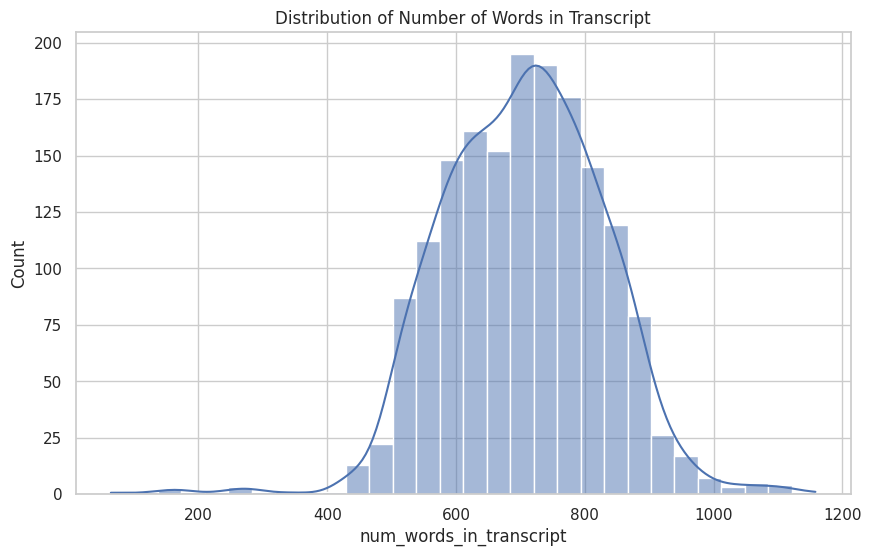

In [12]:
# Distribution of 'num_words_in_transcript'
plt.figure(figsize=(10, 6))
sns.histplot(df['num_words_in_transcript'], kde=True, bins=30)
plt.title("Distribution of Number of Words in Transcript")
plt.show()

### Distribution of Number of Words in Transcripts

Looking at the histogram, we can see how the number of words in the transcripts is distributed. The peak in the graph shows the most common word count range, which gives us an idea of the typical transcript length in this dataset.

### Spread and Variability

The spread of the bars tells us how much variation exists in the word counts. If the bars stretch out far on either side, it means some transcripts are either much shorter or much longer than usual. The curve on top of the histogram (the KDE line) makes it easier to see the overall shape of the distribution.

### Skewness and Outliers

If the graph is uneven or skewed, it could mean that most transcripts are either really short or really long, which might be something to look into further. Outliers, like transcripts with extremely high or low word counts, also stand out and could affect the results of any analysis we do later.

### Conclusion

Overall, this plot gives a good starting point to understand how the data is structured and helps us decide if we need to clean or adjust it before moving on.

**Analyze Categorical Data**

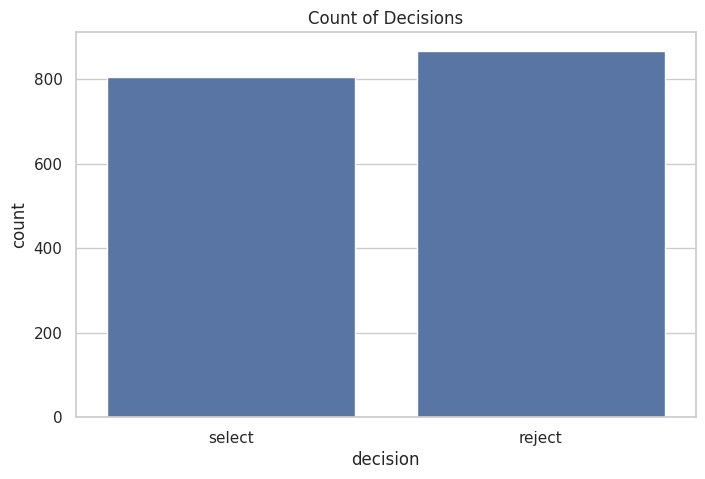

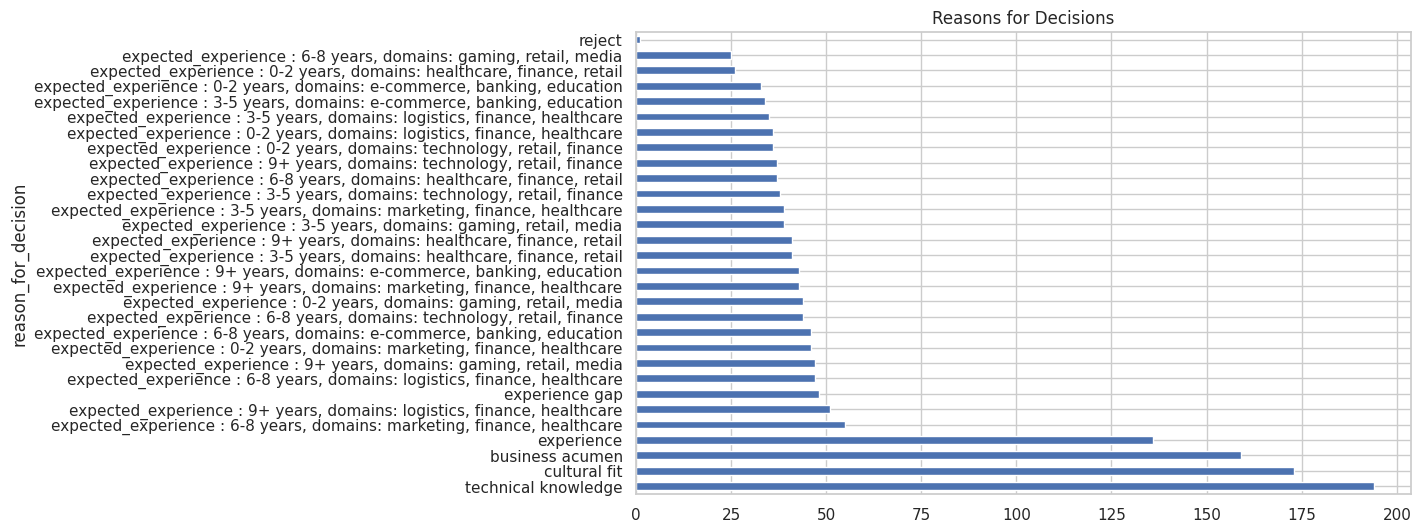

In [13]:
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='decision')
plt.title("Count of Decisions")
plt.show()

# Analyze reasons for decision
df['reason_for_decision'].value_counts().plot(kind='barh', figsize=(10, 6))
plt.title("Reasons for Decisions")
plt.show()

### Count of Decisions

The first plot shows a count of the different decisions in the dataset. Using a `countplot` for the 'decision' column, we can clearly see how many times each decision type appears. This gives us a sense of the distribution of decisions — for instance, if one decision is significantly more frequent than others, it might suggest an imbalance in the data or a predominant outcome.

### Reasons for Decisions

The second plot analyzes the reasons for each decision by visualizing the `reason_for_decision` column. The horizontal bar chart allows us to see the most common reasons behind the decisions. By looking at the length of each bar, we can quickly determine which reasons are most frequently cited and which are less common. This helps identify patterns and potentially influential factors in the decision-making process.

### Conclusion

Together, these visualizations give us insight into the distribution of decisions and the factors influencing those decisions. This information is valuable for understanding the trends and making informed decisions about further analysis or modeling steps.

**Correlation Analysis**

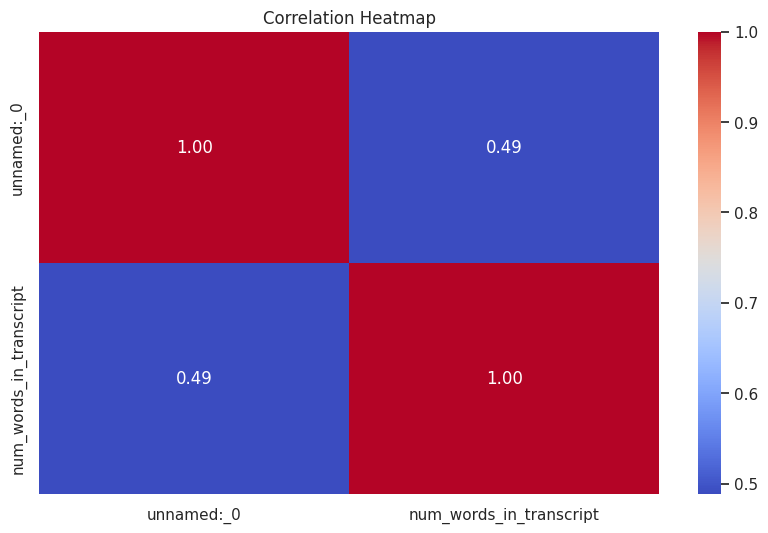

In [15]:
# Select only numeric columns
numeric_df = df.select_dtypes(include=['number'])

# Correlation heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Heatmap")
plt.show()


### Explanation and Insights from the Correlation Heatmap

The correlation heatmap shows relationships between numeric variables. Values range from -1 to 1:

- **1**: Strong positive correlation (both variables increase together),
- **-1**: Strong negative correlation (one increases, the other decreases),
- **0**: No correlation.

#### Key Takeaways:
1. **Strong Positive Correlations**: Variables close to 1 are strongly related.
2. **Negative Correlations**: Values near -1 show an inverse relationship.
3. **Weak/No Correlation**: Values around 0 indicate independence.
4. **Redundant Features**: Highly correlated features may be dropped.

### Conclusion:
The heatmap reveals variable relationships, guiding feature selection and data preprocessing.

# **Feature Engineering**
Now, we create new features to enhance the dataset.
Text Features
Count words in the transcript and resume.
Analyze sentiment or keywords in the text data (using NLP techniques).

In [17]:
# Word counts
df['transcript_word_count'] = df['transcript'].apply(lambda x: len(str(x).split()))
df['resume_word_count'] = df['resume'].apply(lambda x: len(str(x).split()))

# Display new features
df[['transcript', 'transcript_word_count', 'resume_word_count']].head()


,transcript,transcript_word_count,resume_word_count
0,product manager interview transcript\n\ninterv...,620,312
1,software engineer interview transcript\n\ninte...,687,331
2,here is a simulated interview for scott rivera...,511,338
3,interview transcript: emily kelly for ui engin...,748,329
4,data scientist interview transcript\n\ncompany...,541,409


**Text Sentiment Analysis**

In [18]:
from textblob import TextBlob

# Sentiment scores for transcript
df['transcript_sentiment'] = df['transcript'].apply(lambda x: TextBlob(str(x)).sentiment.polarity)

# Sentiment scores for resume
df['resume_sentiment'] = df['resume'].apply(lambda x: TextBlob(str(x)).sentiment.polarity)

# Display sentiment features
df[['transcript_sentiment', 'resume_sentiment']].head()


,transcript_sentiment,resume_sentiment
0,0.107568,0.231019
1,0.091728,0.083958
2,0.060836,0.044141
3,0.100418,0.093188
4,0.042577,0.091739


 **Categorical** **Encoding**

In [19]:
# One-hot encoding for 'role'
df = pd.get_dummies(df, columns=['role'], drop_first=True)

# Label encoding for 'decision'
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['decision_encoded'] = le.fit_transform(df['decision'])

# Display updated data
df.head()


,unnamed:_0,id,name,transcript,resume,decision,reason_for_decision,job_description,num_words_in_transcript,transcript_word_count,resume_word_count,transcript_sentiment,resume_sentiment,role_data engineer,role_data scientist,role_product manager,role_software engineer,role_ui designer,role_ui engineer,decision_encoded
0,0,brenbr359,brent brown,product manager interview transcript\n\ninterv...,here's a sample resume for brent brown applyin...,select,experience,we are looking for a skilled product manager w...,620,620,312,0.107568,0.231019,False,False,True,False,False,False,1
1,1,jameay305,james ayala,software engineer interview transcript\n\ninte...,here's a sample resume for james ayala applyin...,select,experience,we are looking for a skilled software engineer...,687,687,331,0.091728,0.083958,False,False,False,True,False,False,1
2,2,scotri565,scott rivera,here is a simulated interview for scott rivera...,here's a sample resume for scott rivera applyi...,reject,experience,we are looking for a skilled data engineer wit...,511,511,338,0.060836,0.044141,True,False,False,False,False,False,0
3,3,emilke232,emily kelly,interview transcript: emily kelly for ui engin...,here's a sample resume for emily kelly:\n\nemi...,select,experience,we are looking for a skilled ui engineer with ...,748,748,329,0.100418,0.093188,False,False,False,False,False,True,1
4,4,ashlra638,ashley ray,data scientist interview transcript\n\ncompany...,here's a sample resume for ashley ray applying...,reject,cultural fit,we are looking for a skilled data scientist wi...,541,541,409,0.042577,0.091739,False,True,False,False,False,False,0


# **Export the Processed Data**
Save the cleaned and feature-engineered dataset for further use.

In [20]:
# Save to CSV
df.to_csv('processed_data.csv', index=False)

# Download the file
from google.colab import files
files.download('processed_data.csv')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>